## Project 2: Food Delivery Analysis

##Customer Segmentation for Personalized Marketing in Food Delivery Services using Clustering and PCA

### Problem Statement:
In the competitive food delivery industry, businesses often struggle to understand and
engage their diverse user base effectively. Users differ widely in terms of age, spending
habits, order frequency, app usage, and preferences. Without segmenting these users into
meaningful groups, companies miss opportunities to personalize marketing, improve user
satisfaction, and increase retention.

### Project Goal:
The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.

Problem Statement:
- In the competitive food delivery industry, businesses often struggle to understand and
engage their diverse user base effectively. Users differ widely in terms of age, spending
habits, order frequency, app usage, and preferences. Without segmenting these users into
meaningful groups, companies miss opportunities to personalize marketing, improve user
satisfaction, and increase retention.
Project Goal:
- The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.
__________________________
Learning Objectives
Data Understanding & Exploration
1. Load and inspect food delivery user data to understand variable types (e.g., numeric
vs. categorical), ranges, and distributions.

2. Summarize and interpret key statistical properties (mean, median, standard
deviation, skewness) of user behavior features like Age, Total Orders, Average
Spend, etc.

3. Visualize data distributions using histograms, box plots, and pair plots to explore
potential groupings or outliers.

4. Identify relationships between user variables (e.g., App Usage Time and Average
Spend) through correlation matrices and scatter plots.
Data Cleaning & Preprocessing


5. Drop or encode irrelevant or categorical features (e.g., UserID, FavoriteCuisine) as
appropriate for unsupervised learning models.

6. Standardize numerical features using StandardScaler to ensure equal contribution to
distance-based clustering.

7. Evaluate the effect of scaling and dimensionality reduction on the data’s structure
through pre- and post-processing visualizations.
Dimensionality Reduction with PCA

8. Apply Principal Component Analysis (PCA) to reduce high-dimensional data to 2D
for effective visualization of user clusters.

9. Interpret principal components by examining feature loadings to understand which
user behaviors contribute most to variance.

10. Visualize PCA-transformed data to observe potential natural clusters and separation
of user types.
Unsupervised Learning: Clustering

11. Implement K-Means clustering on scaled user data and interpret resulting clusters in
the context of user behavior.

12. Determine the optimal number of clusters using the Elbow Method or Silhouette
Score.

13. Apply Agglomerative (Hierarchical) Clustering and visualize results using
dendrograms to understand hierarchical relationships among users.

14. Compare clustering results from K-Means and Hierarchical Clustering to identify
consistency or divergence in groupings.
Model Evaluation & Visualization

15. Label PCA scatter plots with cluster assignments to visually interpret how users are
grouped in reduced dimensions.

16. Analyze cluster characteristics by computing average values of features within each
cluster (e.g., high spenders, frequent users).

17. Create a cluster profile summary to describe each segment using business-relevant
insights (e.g., “young frequent users,” “older high spenders”).
Critical Thinking & Real-world Framing

18. Frame the clustering output as a customer segmentation strategy for personalized
marketing or product recommendations.

19. Explain how unsupervised learning helps businesses make data-driven decisions in
the absence of labeled training data.

20. Reflect on limitations of clustering models (e.g., sensitivity to scaling, shape of
clusters) and suggest ways to improve (e.g., DBSCAN, inclusion of more behavioral
data).
_______________

### Importing Required Libraries

We begin by importing essential Python libraries for data analysis and visualization:
- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib.pyplot` and `seaborn` for visualizations

In [12]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [13]:
df=pd.read_csv('food_delivery.csv')

In [14]:
#first 5 rows
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In this dataset we have only one feature that non numerical and that is FavoriteCuisine.

### Data Overview

We use `.info()` to understand column types and missing values, and `.describe()` to view statistical summaries like mean, std, min, and max for numerical columns.

In [15]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [16]:
df.describe(include='all') #use include='all to get the all the information about the data regardless of the numerical or classified values

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500,500.000000,500.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,Thai,NaN,NaN
freq,NaN,NaN,NaN,NaN,108,NaN,NaN
mean,250.500000,39.326000,29.714000,306.584680,NaN,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,NaN,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,NaN,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,NaN,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,NaN,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,NaN,4.400000,137.275000


###  Key Highlights from Dataset Summary (Non-Obvious Insights)

- **Wide Spending Gap:** Some users spend up to ₹539/order while others as low as ₹80. Avg = ₹306, but top 25% spend > ₹355 — strong premium segment exists.
  
- **App Usage = Core Differentiator:** Time spent on app varies massively (10 to 179 mins/day). Standard deviation is huge — likely the strongest feature for clustering behavior.

- **Thai Cuisine Dominance:** Chosen by 21.6% of users — not usable for clustering directly, but ideal for targeted cuisine-based promotions.

- **Delivery Ratings Are Inflated:** No users rated below 2.5, and mean is 3.76 — feedback might not reflect true satisfaction. Worth exploring alternate satisfaction signals.

- **Young User Segment Exists:** 25% of users are under age 30 — demographic segmentation opportunity for campaigns/products targeting Gen Z.


### Check for Missing Values

To ensure data quality, we check for missing values in each column using `.isnull().sum()`.

In [17]:
# check if there are any null values in the dataset
df.isnull().sum()

,0
UserID,0
Age,0
TotalOrders,0
AverageSpend,0
FavoriteCuisine,0
DeliveryRating,0
AppUsageTimePerDay,0


### Check for Duplicate Rows

We check how many rows in the dataset are duplicates using `.duplicated().sum()`. If there are duplicates, we can remove them to clean the dataset.

In [18]:
# check for duplicates in the dataset
# This will help us identify if there are any repeated entries in the dataset.
print(df.duplicated().sum())

0


There are no missing values in the dataset

In [19]:
# check the value counts of the 'FavoriteCuisine' column
df['FavoriteCuisine'].value_counts()

,count
FavoriteCuisine,
Thai,108
Italian,106
Indian,104
Mexican,95
Chinese,87


selecting all numerical columns from the DataFrame df

This is useful when you want to perform operations like statistical analysis, plotting, or scaling only on numerical data, while ignoring non-numerical columns like strings or dates.

In [48]:
numercial_cols = df.select_dtypes(include=['int64','float64'])

### Histograms of Key Features

The code below generates histograms for all features in the dataset (except `UserID`):


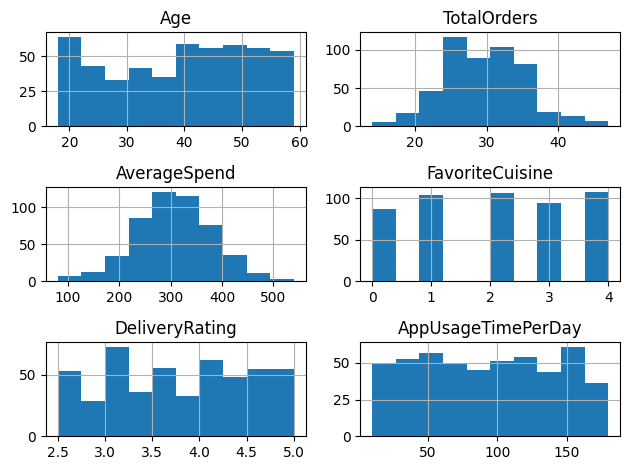

In [51]:
hist = df.drop(columns='UserID',axis=1).hist()
plt.tight_layout()
plt.show()


1. **Age**: Distribution is slightly skewed left — lots of younger users under 30, then more balanced. Suggests strong Gen Z & Millennial presence.

2. **TotalOrders**: Near-normal bell shape centered around 30 orders. Good segmentation potential for casual vs. loyal users.

3. **AverageSpend**: Appears normally distributed, indicating no heavy skew in spending — helpful for stable clustering.

4. **FavoriteCuisine**: Uniformly distributed integers → clearly encoded categories (0–4). We should **drop this** for clustering unless using one-hot encoding.

5. **DeliveryRating**: Bimodal spikes (at 3 and 5) suggest polarized user experiences. Worth investigating dissatisfaction clusters.

6. **AppUsageTimePerDay**: Fairly uniform distribution from 10 to 180 mins — high variance in engagement. **This feature may dominate PCA/Clustering** if not scaled properly.

---


### Using Label encoder
LabelEncoder is used to convert categorical text data into numerical form. It assigns a unique integer (0, 1, 2, ...) to each unique category in a column.

Many machine learning models work only with numerical input. LabelEncoder helps by transforming labels (like 'Male', 'Female', 'Yes', 'No') into numerical values that models can understand.

`le = LabelEncoder()`
- Creates an instance of the LabelEncoder class.

`df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])`

``fit_transform():``

- fit: Finds all unique values in the 'FavoriteCuisine' column.

- transform: Converts each category into a numeric label (e.g., 'Italian' → 0, 'Chinese' → 1, 'Indian' → 2, etc.).

- This replaces the original string values in the column with their corresponding numeric codes.

`df['FavoriteCuisine']`
- Displays the newly transformed 'FavoriteCuisine' column, now with numeric labels.

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])

In [22]:
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,3,4.6,20.9
1,2,46,34,193.97,3,3.0,150.2
2,3,32,22,291.66,3,4.1,59.7
3,4,25,30,232.21,4,3.7,85.5
4,5,38,27,244.84,2,4.7,13.7


### Correlation Matrix

A correlation matrix is a table that shows the pairwise correlation coefficients between multiple variables (usually numerical). It tells us how strongly and in what direction variables are related to each other.

[]

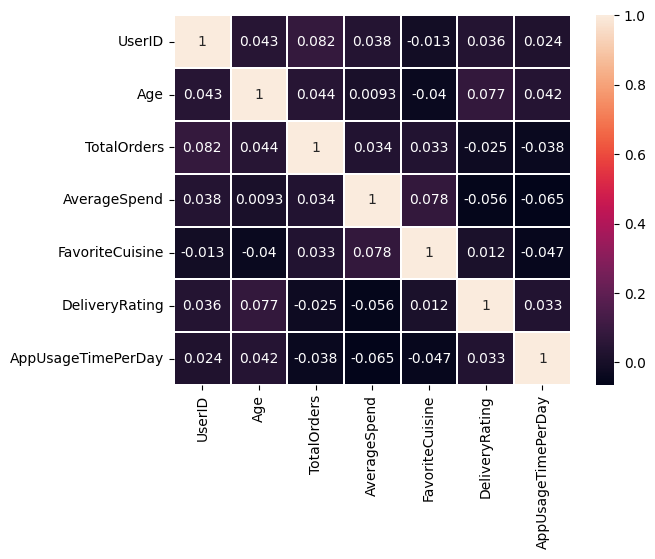

In [40]:
corr=df.corr()
sns.heatmap(corr,annot =True,linewidth=0.1)
plt.plot()

### Keep Only Useful Columns

Irrelevant columns like 'UserID' is removed from the dataset because they do not contribute to clustering. The rest of the features, especially numerical ones, are retained for further processing. This step ensures the model focuses only on meaningful attributes.

In [41]:
X = df.drop('UserID',axis=1)

In [42]:
X

,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,3,4.6,20.9
1,46,34,193.97,3,3.0,150.2
2,32,22,291.66,3,4.1,59.7
3,25,30,232.21,4,3.7,85.5
4,38,27,244.84,2,4.7,13.7
...,...,...,...,...,...,...
495,56,30,398.62,4,4.3,150.7
496,49,27,423.00,0,3.6,39.0
497,41,31,355.66,4,3.6,15.2
498,40,29,305.66,4,4.1,44.8


### Standardize Your Data

Standardization is applied to scale the data so that all features contribute equally to the clustering algorithms. This process transforms the data to have a mean of 0 and standard deviation of 1. Without scaling, features with larger ranges may dominate the clustering process.

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Reduce Dimensions Using PCA

Principal Component Analysis (PCA) is applied to reduce the dataset to two dimensions. This is done to visualize high-dimensional data in 2D space. PCA also helps to remove redundancy in data by combining correlated features into principal components.

Why Use PCA?
Too many features can lead to:

- Slow model performance

- Overfitting

- Difficulty in visualization

PCA helps by:

- Removing redundant or correlated features

- Making the data easier to visualize (2D or 3D)

- Improving model speed and sometimes accuracy



In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

### Group Users Using KMeans Clustering

KMeans is an unsupervised machine learning algorithm used to group similar data points into clusters. In this step, the standardized dataset is grouped into 3 clusters using KMeans. The output is a label for each user indicating which cluster they belong to.

- KMeans: Partitions data into k distinct non-overlapping groups.
- AgglomerativeClustering: A type of hierarchical clustering that builds nested clusters by merging or splitting them.
- DBSCAN: Density-Based Spatial Clustering that groups points close to each other and marks outliers as noise.

---


`from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN`

This line imports three clustering algorithms from `sklearn.cluster`:

* `KMeans`: a partition-based clustering method.
* `AgglomerativeClustering`: a hierarchical clustering method.
* `DBSCAN`: a density-based clustering method.

---

`kmeans = KMeans(n_clusters=3)`

* This creates an instance of the **KMeans** clustering algorithm, where you're specifying that you want to divide the data into **3 clusters**.

---

`kmeans_labels = kmeans.fit_predict(X_scaled)`

* `fit_predict()` does two things:

  1. Fits the KMeans model to the **scaled data** (`X_scaled`).
  2. Assigns a **cluster label** (0, 1, or 2) to each data point based on which cluster it belongs to.
* The result, `kmeans_labels`, is an array of cluster assignments for each user.

---

`centriod_pca = pca.transform(kmeans.cluster_centers_)`


* `kmeans.cluster_centers_` contains the **coordinates of the cluster centers** in the original feature space.
* `pca.transform(...)` projects those centers into **PCA space** (2D space, if you used `n_components=2` earlier).
* The result, `centriod_pca`, gives you the **cluster centroids in the reduced PCA coordinate system**, which can be used for plotting.

---


In [56]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
kmeans = KMeans(n_clusters =3)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [57]:
centriod_pca = pca.transform(kmeans.cluster_centers_)

### Visualize the Clusters Using a Scatter Plot

The PCA-reduced data is plotted in a 2D scatter plot where each point represents a user. Different colors represent different clusters found by KMeans. This visual helps in understanding how well the clusters are separated in the feature space.


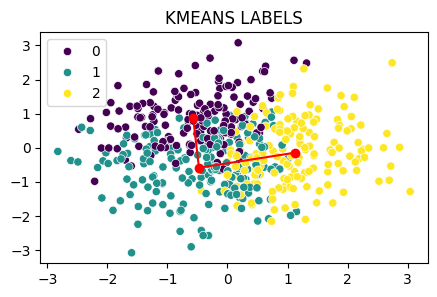

In [29]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = kmeans_labels,palette="viridis")
plt.plot(centriod_pca[:,0],centriod_pca[:,1],color='red',marker='o')
plt.title("KMEANS LABELS")
plt.show()


The scatter plot displays PCA-reduced user data in 2D, where each point is a user and colors represent `kmeans_labels`. PCA compresses high-dimensional standardized features into two principal components (`PC1`, `PC2`) while preserving maximum variance. Red markers show cluster centers from `kmeans.cluster_centers_`, projected into PCA space using `pca.transform()`.


Clusters are fairly well-separated, indicating that features like `AverageSpend` and `AppUsageTimePerDay` contribute meaningful variance. Cluster `2` appears more dispersed, while cluster `1` is compact, implying lower intra-cluster variance. The red centroids align well with the center of each group, suggesting KMeans converged effectively.


Some overlap is visible, especially near the origin, where users share similar feature values. These borderline cases may not be well-handled by hard clustering; alternatives like `DBSCAN` or `GaussianMixture` could provide better segmentation by modeling density or soft membership.


### Group Users with Agglomerative Clustering

 Clustering with Agglomerative Clustering
What is Agglomerative Clustering?
- Agglomerative Clustering is a type of hierarchical clustering that builds clusters in a bottom-up approach:
- Each data point starts as its own cluster.
- Closest clusters are merged step-by-step.
- The process continues until the desired number of clusters (n_clusters) is reached.

In [58]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

### Visualize Clusters Using Agglomerative Clustering

A scatter plot is created to visualize the output from Agglomerative Clustering. Each user is shown as a point in PCA space, colored according to the cluster they belong to. This plot helps compare the performance of Agglomerative Clustering with KMeans.


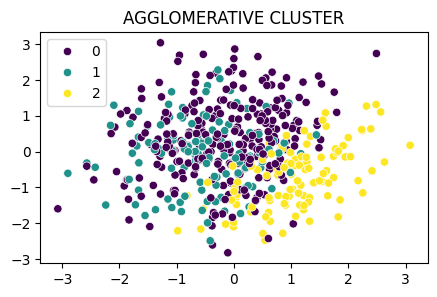

In [31]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=agglo_labels,palette="viridis")
plt.title("AGGLOMERATIVE CLUSTER")
plt.show()

This plot shows the result of `AgglomerativeClustering` on PCA-reduced data. Each point is a user, and colors represent cluster labels. The algorithm hierarchically merges similar users based on distance, forming three clusters.

Cluster `2` (yellow) is more distinct on the right, while clusters `0` and `1` overlap near the center, indicating that users in those groups share similar feature profiles. Compared to KMeans, Agglomerative Clustering captures local structure but struggles with compact, overlapping regions.

The overlap suggests possible limitations in distinguishing dense areas, which could be improved by changing linkage criteria or trying density-based clustering like `DBSCAN`.


### Build a Dendrogram to Visualize Cluster Formation

A dendrogram is a tree-like diagram that shows the merging of clusters at each step in hierarchical clustering. It helps to understand how clusters are formed and can be used to decide the optimal number of clusters by observing where large vertical gaps exist.


- linkage: Computes the linkage matrix, which encodes the hierarchical clustering steps.

Computes the linkage matrix using the 'ward' method:
- The Ward method minimizes the variance within clusters when merging.
- It is well-suited for Euclidean distance-based clustering.

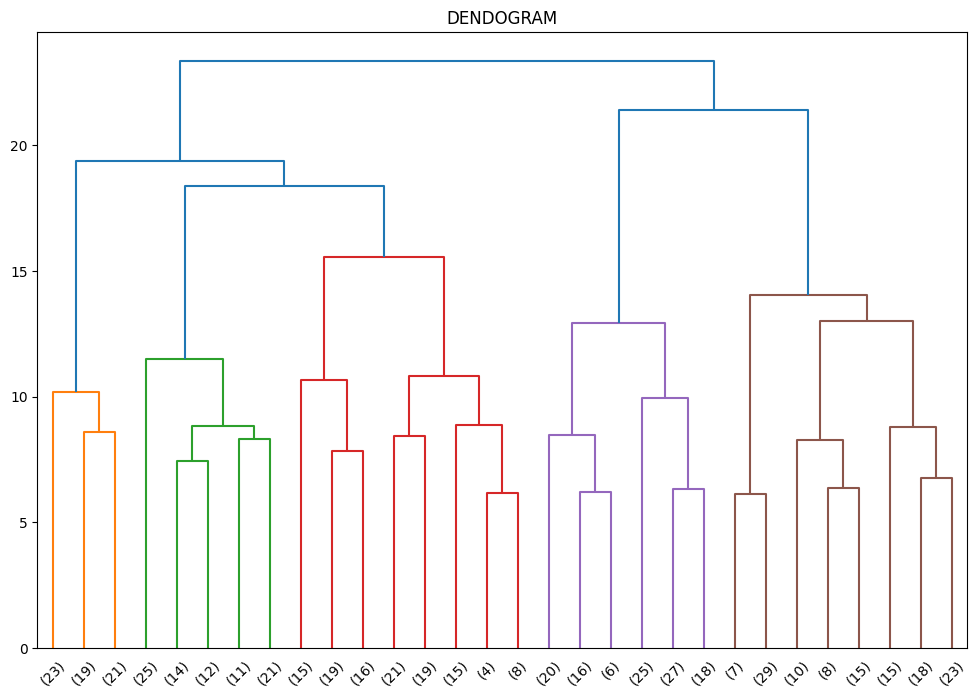

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(12,8))
link = linkage(X_scaled,method='ward')
dendrogram(link,p=30,truncate_mode='lastp')
plt.title("DENDOGRAM")
plt.show()

This dendrogram visualizes the hierarchical merging process used in **Agglomerative Clustering**. It shows how individual data points (or small clusters) are combined step-by-step into larger clusters based on their similarity, forming a tree-like structure.

* **X-axis**: Sample indices (or small clusters).
* **Y-axis**: Linkage distance (how far apart the clusters were when merged).
* The **height** of each merge (vertical lines) indicates the **distance (dissimilarity)** between the merged clusters.
* **Taller merges** imply clusters that were less similar and joined later.

### How It Works

1. Each point starts as its own cluster.
2. At each step, the two **closest clusters** (based on a linkage metric like Ward, average, or complete) are merged.
3. This process repeats until all points are combined into a single cluster at the top of the tree.

To choose the number of clusters, a **horizontal cut** across the dendrogram is made at a specific height. For example, cutting at a height where there are **three large vertical jumps** will give you **three clusters**.

---

This plot helps determine the **optimal number of clusters** by identifying **significant gaps** between merges. Large vertical gaps between horizontal joins suggest **well-separated clusters**.


### Discover User Patterns with DBSCAN Clustering
- What is DBSCAN?
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are close to each other based on a distance metric, and labels points in low-density areas as noise (outliers).
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is applied to identify clusters of users based on data density. Unlike KMeans, DBSCAN can find arbitrarily shaped clusters and can also detect outliers as noise points.


In [33]:
db = DBSCAN(eps=1.5,min_samples=5)
db_labels = db.fit_predict(X_scaled)

Applies DBSCAN clustering to the scaled data. Points are grouped based on density, not shape or distance from centroids.

Output: `db_labels` contains cluster assignments, including -1 for outliers.

In [34]:
# Count number of clusters (excluding noise)
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("Number of clusters formed by DBSCAN:", n_clusters)

Number of clusters formed by DBSCAN: 1


In [35]:
print("Unique labels:", np.unique(db_labels))

Unique labels: [-1  0]


In [36]:
from collections import Counter
label_counts = Counter(db_labels)
print("Label Counts:", label_counts)

Label Counts: Counter({np.int64(0): 456, np.int64(-1): 44})


In [37]:
# Count outliers (label = -1)
n_outliers = list(db_labels).count(-1)
print("Number of outliers (noise points):", n_outliers)

Number of outliers (noise points): 44


### Visualize DBSCAN Clustering with a Scatter Plot

The results of DBSCAN clustering are visualized using a 2D scatter plot of PCA components. Each point is colored by its cluster label. Noise points, which do not belong to any cluster, are typically shown in a separate color (e.g., gray or black).


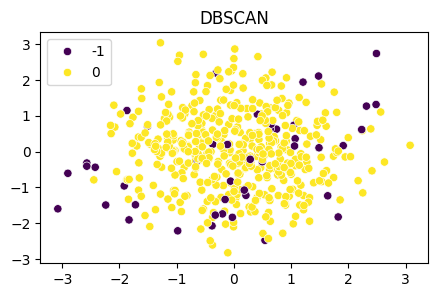

In [38]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=db_labels,palette="viridis")
plt.title("DBSCAN")
plt.show()

---
This scatter plot shows the output of the `DBSCAN` clustering algorithm on PCA-reduced data (`PC1`, `PC2`). Each point represents a user. Yellow points (`label = 0`) form the single cluster detected by DBSCAN, while purple points (`label = -1`) are **noise points** (outliers) that did not meet the density criteria.

DBSCAN groups data based on density, not shape or size. It requires a minimum number of points (`min_samples=5`) within a given radius (`eps=1.5`) to form a cluster. In this case, **only one dense region** was detected, and **44 users were classified as outliers**, shown scattered around the plot.

This result indicates the data does not contain multiple dense, well-separated regions under the current parameter settings. To improve clustering, you may need to **tune `eps` and `min_samples`**, or apply DBSCAN on a different feature space or higher-dimensional projection.


### Final Conclusion

This project successfully applied various unsupervised machine learning techniques to segment users of a food delivery application based on their behavioral and preference data.It includes data cleaning, encoding categorical features, and standardizing numerical values. Principal Component Analysis (PCA) was used to reduce the dimensionality of the dataset, enabling clear visualizations and improving clustering performance.

Multiple clustering algorithms were then explored, including KMeans, Agglomerative Clustering, and DBSCAN. Each algorithm revealed different structures and patterns in the data. KMeans provided a fast and efficient partitioning of users into three distinct groups based on similarities. Agglomerative Clustering helped understand how users could be merged hierarchically, and the dendrogram visualization provided deeper insights into the grouping structure. DBSCAN allowed the detection of arbitrary-shaped clusters and successfully identified outlier users who did not fit into any of the main groups.

Overall, the clustering analysis demonstrated that users of the food delivery service exhibit diverse behaviors and preferences, which can be effectively captured and grouped using unsupervised learning techniques.